# Data analysis techniques - individual project
# Carmel Gafa

## Some background - what we are talking about

​The `Arousal-Valence Model` is a visual framework that organizes emotions based on arousal (ranging from calm to agitated) and valence (ranging from negative to positive). By pinpointing one's position within this matrix, individuals can better understand their emotional states, enhancing both emotional and bodily awareness. This tool is particularly beneficial for neurodivergent individuals who may face challenges in identifying and regulating emotions, as it bridges the gap between physical sensations and emotional recognition. ​

Visual aids like the `Arousal-Valence Model` are instrumental in improving emotional intelligence, especially for those with neurodivergent traits such as ADHD or autism. These individuals often experience heightened levels of alexithymia, making it difficult to label and process emotions. By utilizing visual tools, they can more effectively recognize patterns in their emotional experiences and identify triggers that lead to specific responses. This approach not only aids in emotional identification but also supports the development of coping strategies, ultimately fostering better emotional regulation and well-being. ​


<div>
<img src="img/img-arousal-valence.png" width="500"/>
</div>

---

Source: https://neurodivergentinsights.com/arousal-valence-model/


In [88]:
# imports

import pandas as pd
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Preamble - Loading the data and initial inspection to get acquainted with the data

The data is uploaded and inspected in this stage. The following steps are carried out:

- The data is loaded into a pandas dataframe
- A summary of the data is created that contains:
    - Feature name
    - Non-null count . It was noted that **all records** contained 7238 non-null values
    - Data type. It was noted that the `participant` feature is an integer, while all other features are floats. The response variables are also floats.
- An additional summary is created that shows the 10 features with the highest number of non-null values was carried out

### An initial look at the target values

- We start by examining the distributions of the two response variables, `median_arousal` and `median_valence`. We note that the distribution of `median_arousal` is skewed to the left, while the distribution of `median_valence` is skewed to the right.
- We examine the descriptive statistics of the two response variables. We note that for 
    - `median_arousal` 
        - the mean is 0.010609
        - the skewness is -0.424667, indicating that the distribution is skewed to the left
        - the kurtosis is  -0.260799, indicating that the distribution is slightly platykurtic, that is, it is flatter than a normal distribution
    - `median_valence`
        - the mean is 0.083961.
        - the skewness is 0.698025, indicating that the distribution is skewed to the right
        - the kurtosis is 0.192967, indicating that the distribution is slightly leptokurtic, that is, it is more peaked than a normal distribution
- We finally plot `median_arousal` vs `median_valence` scatter plot to identify the relationship between the two predictors. 
    - The data shows a somewhat positive trend between the predictors although possibly not linear. 


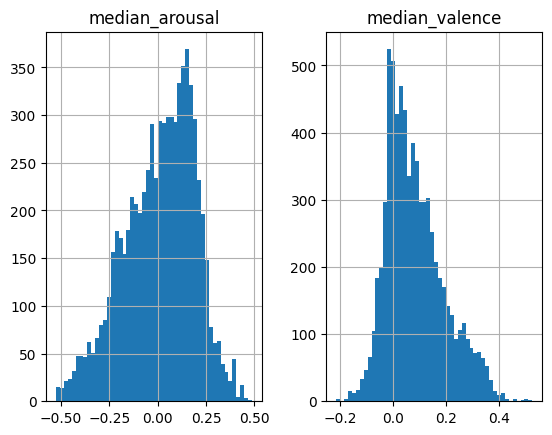

desccriptive statistics of arousal and valence:
-----------------------------------------------
       median_arousal  median_valence
count     7238.000000     7238.000000
mean         0.010609        0.083961
std          0.182776        0.109831
min         -0.526533       -0.214067
25%         -0.115183        0.001067
50%          0.034000        0.063900
75%          0.149317        0.147383
max          0.487000        0.526133
skewness of arousal and valence:
--------------------------------
median_arousal   -0.424667
median_valence    0.698025
dtype: float64
kurtosis of arousal and valence:
--------------------------------
median_arousal   -0.260799
median_valence    0.192967
dtype: float64


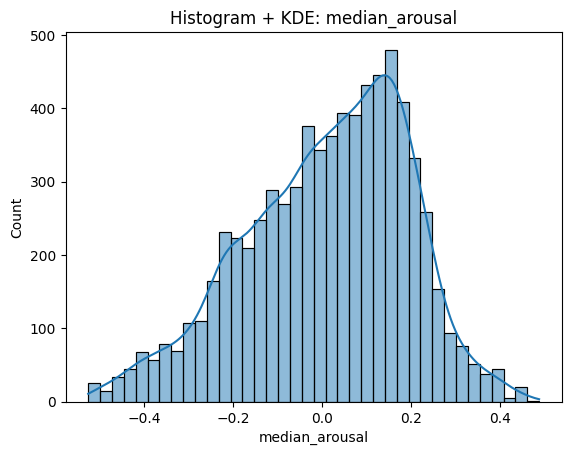

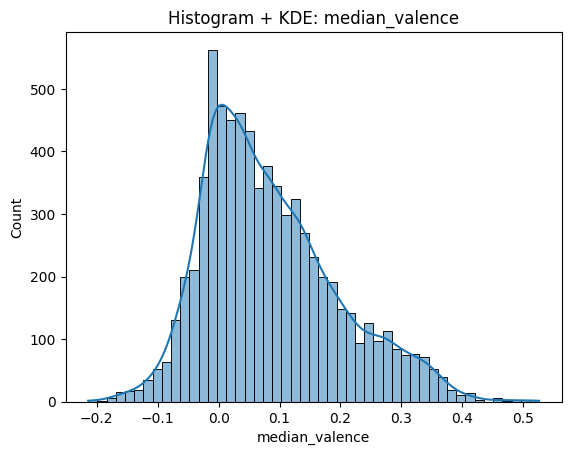

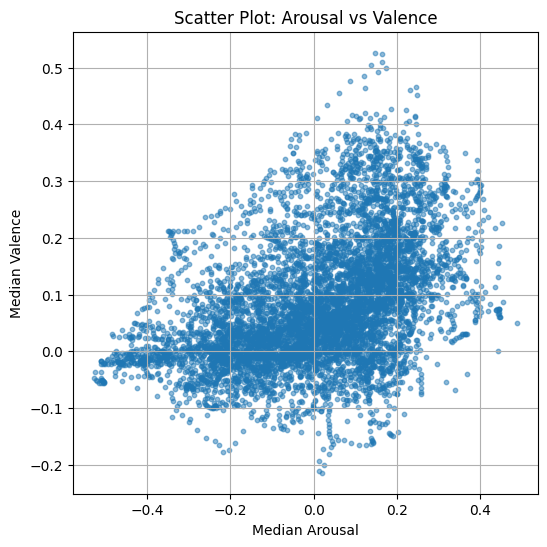

In [89]:
data_folder = 'data/'
data_filename = 'project_data.csv'

data_path = os.path.join(data_folder, data_filename)
df_raw = pd.read_csv(data_path, sep=',', header=0, encoding='utf-8')

# print(df_raw.head())


df_summary = pd.DataFrame({
    'Feature': df_raw.columns,
    'Non-Null Count': df_raw.notnull().sum().values,
    'Data Type': df_raw.dtypes.values
})

# just to be certain about non nulls
df_raw.isnull().sum().sort_values(ascending=False).head(10)


### An initial look at the target values
### ------------------------------------

df_raw[['median_arousal', 'median_valence']].hist(bins=50)
plt.show()

print('desccriptive statistics of arousal and valence:')
print('-----------------------------------------------')
print(df_raw[['median_arousal', 'median_valence']].describe())
print('skewness of arousal and valence:')
print('--------------------------------')
print(df_raw[['median_arousal', 'median_valence']].skew())
print('kurtosis of arousal and valence:')
print('--------------------------------')
print(df_raw[['median_arousal', 'median_valence']].kurt())


### Histograms of predictors

for col in ['median_arousal', 'median_valence']:
    sns.histplot(df_raw[col], kde=True)
    plt.title(f"Histogram + KDE: {col}")
    plt.show()

### relationships between predictors


plt.figure(figsize=(6, 6))
plt.scatter(df_raw['median_arousal'], df_raw['median_valence'], alpha=0.5, s=10)
plt.xlabel('Median Arousal')
plt.ylabel('Median Valence')
plt.title('Scatter Plot: Arousal vs Valence')
plt.grid(True)
plt.show()



## Task 1
If you were asked to build a model for predicting arousal and valence, using the provided audio
features as explanatory variables:

### Which performance metrics would you use to evaluate your model’s predictions?

We will treat this task as regression as the response variables `median_arousal` and `median_valence` are continuous. Therefore the following metrics should be considered:


 
1.  The **Mean Absolute Error (MAE)** metric addressed the deficiencies of the **Mean Error (ME)** metric by  considering the absolute value of the residuals;$$ME = \frac{\sum_{i=1}^{n} | \hat{y}_i-y_i | }{n}$$
Mean absolute error is often used where the data being considered contains outliers as it is less sensitive to large deviations when compared to other cost functions like the mean square error.
2. Another alternative to counteract the limitations of **Mean Error (ME)** is to square the values of the residuals;$$MSE = \frac{\sum_{i=1}^{n} ( \hat{y}^{(i)}-y^{(i)} )^{2} }{n}$$ Mean square error (MSE) diminishes the effect of negligible residuals but amplifies the one contribution of larger residuals. This method is therefore not recommended when the data contains outliers.




### Does the selection of the performance metric depend on the type of the response variables? Explain your reasoning.

### Which validation protocol (e.g., holdout set, k-fold cross-validation, etc.) would you use given that the objective is to build a predictive model able to generalise across participants (i.e., make accurate predictions for unseen participants)? Justify your choice.